#       **Beta-Lactamase Data**


[@ Kushal Raj Roy](https://twitter.com/kushalroy59)


**Beta lactamase is an enzyme produced by both the gram positive and gram negative bacteria to defence against beta-lactam drug molecules.In this notebook I will try to calculate PIC50 value.**

**Mechanism of beta-lactam inactivation:
        
        
<img src="beta_lactamase.png" style="width:600px;height:300px"/>    

        
   ### Notebook outlines: 
        
       1. Exploratory Data Analysis.
       2. Calculate Lipsinki's descriptor for pIC50.
       3.  Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors.     
       


For our information, I am new at machine learning. Any kind of suggestions and improvements will be appriciated. I hope it will be helpful for someone like me. 


### This project is suggested by:

[Chanin Nantasenamat](https://scholar.google.com/citations?user=df-l7zQAAAAJ&hl=en)

[Data Professor YouTube channel](https://youtube.com/dataprofessor)


### Let's Learn Together!

In [1]:
#download beta-lactamase zip file:

#wget https://github.com/dataprofessor/beta-lactamase/raw/main/beta_lactamase_CHEMBL29.zip

In [2]:
#unzip file

#unzip beta_lactamase_CHEMBL29.zip

In [3]:
#to check extracts list

! ls *.csv | wc -l

145


In [4]:
# import zipfile module to read the zip file file # "r" means read. 
# prepare data set using pandas *.concat. and define f in zf.namelist().


import zipfile
import pandas as pd
import numpy as np

zf = zipfile.ZipFile("beta_lactamase_CHEMBL29.zip", "r")
df = pd.concat( (pd.read_csv( zf.open(f) ) for f in zf.namelist() ) )

#  1. Exploratory Data Analysis

In [5]:
# dataset information

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 71973 entries, 0 to 17
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  71973 non-null  object 
 1   canonical_smiles    71937 non-null  object 
 2   standard_relation   70934 non-null  object 
 3   standard_value      71185 non-null  float64
 4   standard_units      70521 non-null  object 
 5   standard_type       71969 non-null  object 
 6   pchembl_value       64424 non-null  float64
 7   target_pref_name    71973 non-null  object 
 8   bao_label           71973 non-null  object 
dtypes: float64(2), object(7)
memory usage: 5.5+ MB


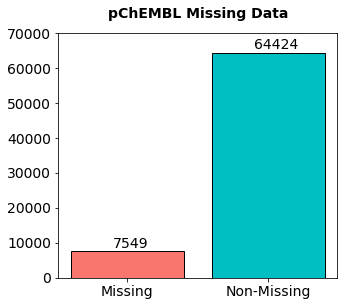

In [6]:
# Bar plot of Missing vs Non-Missing Data in pchembl_value

import matplotlib.pyplot as plt

# Data
missing = df.pchembl_value.isnull().sum()
nonmissing = df.pchembl_value.notnull().sum()

x = ['Missing', 'Non-Missing']
y = [missing, nonmissing]

# Setup plot
fig, ax = plt.subplots()

# Make bar plot
p = ax.bar(x, y, color = ['#F8766D', '#00BFC4'], ec = 'black')

ax.set_title('pChEMBL Missing Data', fontsize=14, fontweight='bold', pad=15)
#ax.set_xticklabels(x, fontweight='bold')

ax.set_ylim(0,70000)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# Label above bar
for index, data in enumerate(y):
    plt.text(x=index-0.1 , y =data+1000 , s=f"{data}" , fontdict=dict(fontsize=14))

fig.set_size_inches(5,4.5)
plt.show()

### 1.1  Analyzing Pchembl Value 

In [7]:
# Non-missing data with pChEMBL value

df2 = df[df.pchembl_value.notnull()]
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64424 entries, 47 to 109
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   molecule_chembl_id  64424 non-null  object 
 1   canonical_smiles    64408 non-null  object 
 2   standard_relation   64424 non-null  object 
 3   standard_value      64424 non-null  float64
 4   standard_units      64424 non-null  object 
 5   standard_type       64424 non-null  object 
 6   pchembl_value       64424 non-null  float64
 7   target_pref_name    64424 non-null  object 
 8   bao_label           64424 non-null  object 
dtypes: float64(2), object(7)
memory usage: 4.9+ MB


In [8]:
#remove data without bioactivity class

df2_smiles = df2[df2.canonical_smiles.notna()]
df2_smiles

,molecule_chembl_id,canonical_smiles,standard_relation,standard_value,standard_units,standard_type,pchembl_value,target_pref_name,bao_label
47,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,9.0,nM,IC50,8.05,Gil1,assay format
48,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,40.0,nM,IC50,7.40,Gil1,assay format
7,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,70.0,nM,IC50,7.16,Beta-lactamase SCO-1,single protein format
8,CHEMBL403,CC1(C)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(=O)=O,=,6200.0,nM,IC50,5.21,Beta-lactamase SCO-1,single protein format
9,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,10.0,nM,IC50,8.00,Beta-lactamase SCO-1,single protein format
...,...,...,...,...,...,...,...,...,...
57,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,374.0,nM,IC50,6.43,Carbepenem-hydrolyzing beta-lactamase KPC,assay format
90,CHEMBL404,C[C@]1(Cn2ccnn2)[C@H](C(=O)O)N2C(=O)C[C@H]2S1(...,=,370.0,nM,IC50,6.43,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format
91,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,10500.0,nM,IC50,4.98,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format
107,CHEMBL777,O=C(O)[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21,=,11000.0,nM,Ki,4.96,Carbepenem-hydrolyzing beta-lactamase KPC,single protein format


In [9]:
#remove duplicates to avoid redundancy

#define function

def remove_duplicates(data):

#lets assign mean value.
    mean_value = data.groupby('molecule_chembl_id').mean()
# now we will calculate standard value    
    std_value = data.groupby('molecule_chembl_id').std()
#lets sort out pchembl value which is less than 2    
    std_new = std_value[std_value.pchembl_value < 2]
#filtering new standard value    
    std_fil = std_value.filter(items=std_new.index, axis=0)
#lets assign new rows    
    new_rows = {}
#iterate loop at new rows
    for i in std_new.index:
        
        rows = data.loc[data.molecule_chembl_id == i].copy()
        row = rows.iloc[0].copy()
        row.standard_value = std_fil.loc[i].standard_value
        row.pchembl_value = std_fil.loc[i].pchembl_value
        new_rows[i] = row
        
    df_new_rows = pd.DataFrame(new_rows).T
    data = data.drop_duplicates(subset=["molecule_chembl_id"], keep=False)
    data = pd.concat([data, df_new_rows], axis=0).reset_index(drop=True)

    return data

In [10]:
#applying remove duplicates in dataset

df3 = remove_duplicates(df2_smiles)
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63014 entries, 0 to 63013
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  63014 non-null  object
 1   canonical_smiles    63014 non-null  object
 2   standard_relation   63014 non-null  object
 3   standard_value      63014 non-null  object
 4   standard_units      63014 non-null  object
 5   standard_type       63014 non-null  object
 6   pchembl_value       63014 non-null  object
 7   target_pref_name    63014 non-null  object
 8   bao_label           63014 non-null  object
dtypes: object(9)
memory usage: 4.3+ MB


In [11]:
#now we will create bioactivity class and divide it among the three class

bioactivity_threshold = []
for i in df3.standard_value:
  if float(i) >= 10000:
    bioactivity_threshold.append("inactive")
  elif float(i) <= 1000:
    bioactivity_threshold.append("active")
  else:
    bioactivity_threshold.append("intermediate")

In [12]:
# bioactivity class series

bioactivity_class = pd.Series(bioactivity_threshold, name='class')
df3_class = pd.concat([df3, bioactivity_class], axis=1)
df3_class.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63014 entries, 0 to 63013
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  63014 non-null  object
 1   canonical_smiles    63014 non-null  object
 2   standard_relation   63014 non-null  object
 3   standard_value      63014 non-null  object
 4   standard_units      63014 non-null  object
 5   standard_type       63014 non-null  object
 6   pchembl_value       63014 non-null  object
 7   target_pref_name    63014 non-null  object
 8   bao_label           63014 non-null  object
 9   class               63014 non-null  object
dtypes: object(10)
memory usage: 4.8+ MB


## 2. calculating lipsinki's descriptors 


In [13]:
# selecting four class for the descriptors

selection = ['molecule_chembl_id','canonical_smiles','standard_value', 'class']
df4_select = df3_class[selection]
df4_select.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63014 entries, 0 to 63013
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  63014 non-null  object
 1   canonical_smiles    63014 non-null  object
 2   standard_value      63014 non-null  object
 3   class               63014 non-null  object
dtypes: object(4)
memory usage: 1.9+ MB


In [14]:
#dropping canonical smiles column

df_no_smiles = df4_select.drop(columns='canonical_smiles')
df_no_smiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63014 entries, 0 to 63013
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   molecule_chembl_id  63014 non-null  object
 1   standard_value      63014 non-null  object
 2   class               63014 non-null  object
dtypes: object(3)
memory usage: 1.4+ MB


In [15]:
#lets create a new class to iterate smiles

smiles = []

for i in df4_select.canonical_smiles.tolist():
  cpd = str(i).split('.')
  cpd_longest = max(cpd, key = len)
  smiles.append(cpd_longest)

smiles = pd.Series(smiles, name = 'canonical_smiles')

In [16]:
# merging without smiles and smiles 

df_clean_smiles = pd.concat([df_no_smiles,smiles], axis=1)
df_clean_smiles

,molecule_chembl_id,standard_value,class,canonical_smiles
0,CHEMBL3112752,28000.0,inactive,N[C@@H](Cc1ccc(NC(=O)[C@@H]2CC[C@@H]3CN2C(=O)N...
1,CHEMBL3112746,20000.0,inactive,O=C(Nc1ccncc1)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)...
2,CHEMBL1173339,2000.0,intermediate,CCC(S)P(=O)(OC(C)C)OC(C)C
3,CHEMBL1172388,15000.0,inactive,CCC(S)P(=O)(O)O
4,CHEMBL1256967,2700.0,intermediate,CC1(C)[C@H](NC(=O)/C(=N\OCc2cc(=O)c(O)cn2O)c2c...
...,...,...,...,...
63009,CHEMBL87686,6984.086607,intermediate,O=C(O)[C@H](S)Cc1ccc2oc3ccccc3c2c1
63010,CHEMBL87719,339.411255,active,CC1(C)[C@H](C(=O)O)N2C(=O)[C@]3(C[C@@H]3OC3CCC...
63011,CHEMBL891,7496.901315,intermediate,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...
63012,CHEMBL9306,234.759451,active,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21


In [17]:
#import necessary libraries for calculation

import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [18]:
# Inspired by: https://codeocean.com/explore/capsules?query=tag:data-curation

def lipinski(smiles, verbose=False):

    moldata= []
    for elements in smiles:
        mol=Chem.MolFromSmiles(elements) 
        moldata.append(mol)
       
    baseData= np.arange(1,1)
    i=0  
    for mol in moldata:        
       
        desc_MolWt = Descriptors.MolWt(mol)
        desc_MolLogP = Descriptors.MolLogP(mol)
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors])   
    
        if(i==0):
            baseData=row
        else:
            baseData=np.vstack([baseData, row])
        i=i+1      
    
    columnNames=["MW","LogP","NumHDonors","NumHAcceptors"]   
    descriptors = pd.DataFrame(data=baseData,columns=columnNames)
    
    return descriptors

In [19]:
# lets look at descriptors result for canonical smiles 

df_lipinski = lipinski(df_clean_smiles.canonical_smiles)
df_lipinski

,MW,LogP,NumHDonors,NumHAcceptors
0,428.423,-0.41750,4.0,7.0
1,342.333,0.02310,2.0,6.0
2,240.305,3.69540,1.0,4.0
3,156.143,0.83000,3.0,2.0
4,518.486,-1.40920,5.0,14.0
...,...,...,...,...
63009,272.325,3.51150,2.0,3.0
63010,357.428,0.92290,1.0,5.0
63011,435.889,2.54872,2.0,6.0
63012,198.154,-2.43030,1.0,5.0


In [20]:
# merging the selection and lipinski's canonical smiles descriptors

df4_combined = pd.concat([df4_select,df_lipinski], axis=1)
df4_combined

,molecule_chembl_id,canonical_smiles,standard_value,class,MW,LogP,NumHDonors,NumHAcceptors
0,CHEMBL3112752,N[C@@H](Cc1ccc(NC(=O)[C@@H]2CC[C@@H]3CN2C(=O)N...,28000.0,inactive,428.423,-0.41750,4.0,7.0
1,CHEMBL3112746,O=C(Nc1ccncc1)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)...,20000.0,inactive,342.333,0.02310,2.0,6.0
2,CHEMBL1173339,CCC(S)P(=O)(OC(C)C)OC(C)C,2000.0,intermediate,240.305,3.69540,1.0,4.0
3,CHEMBL1172388,CCC(S)P(=O)(O)O,15000.0,inactive,156.143,0.83000,3.0,2.0
4,CHEMBL1256967,CC1(C)[C@H](NC(=O)/C(=N\OCc2cc(=O)c(O)cn2O)c2c...,2700.0,intermediate,518.486,-1.40920,5.0,14.0
...,...,...,...,...,...,...,...,...
63009,CHEMBL87686,O=C(O)[C@H](S)Cc1ccc2oc3ccccc3c2c1,6984.086607,intermediate,272.325,3.51150,2.0,3.0
63010,CHEMBL87719,CC1(C)[C@H](C(=O)O)N2C(=O)[C@]3(C[C@@H]3OC3CCC...,339.411255,active,357.428,0.92290,1.0,5.0
63011,CHEMBL891,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,7496.901315,intermediate,435.889,2.54872,2.0,6.0
63012,CHEMBL9306,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[Li+],234.759451,active,198.154,-2.43030,1.0,5.0


In [21]:
# Convert IC50 to pIC50

# https://github.com/chaninlab/estrogen-receptor-alpha-qsar/blob/master/02_ER_alpha_RO5.ipynb

import numpy as np

def pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
        
    return x

In [22]:
df4_combined.standard_value.describe()

count     63014.0
unique     1349.0
top         631.0
freq       5453.0
Name: standard_value, dtype: float64

In [23]:
# standard value normalization

def norm_value(input):
    norm = []

    for i in input['standard_value']:
        if i > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [24]:
df_norm = norm_value(df4_combined)
df_norm

/tmp/ipykernel_59011/4052795578.py:12: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,standard_value_norm
0,CHEMBL3112752,N[C@@H](Cc1ccc(NC(=O)[C@@H]2CC[C@@H]3CN2C(=O)N...,inactive,428.423,-0.41750,4.0,7.0,28000.000000
1,CHEMBL3112746,O=C(Nc1ccncc1)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)...,inactive,342.333,0.02310,2.0,6.0,20000.000000
2,CHEMBL1173339,CCC(S)P(=O)(OC(C)C)OC(C)C,intermediate,240.305,3.69540,1.0,4.0,2000.000000
3,CHEMBL1172388,CCC(S)P(=O)(O)O,inactive,156.143,0.83000,3.0,2.0,15000.000000
4,CHEMBL1256967,CC1(C)[C@H](NC(=O)/C(=N\OCc2cc(=O)c(O)cn2O)c2c...,intermediate,518.486,-1.40920,5.0,14.0,2700.000000
...,...,...,...,...,...,...,...,...
63009,CHEMBL87686,O=C(O)[C@H](S)Cc1ccc2oc3ccccc3c2c1,intermediate,272.325,3.51150,2.0,3.0,6984.086607
63010,CHEMBL87719,CC1(C)[C@H](C(=O)O)N2C(=O)[C@]3(C[C@@H]3OC3CCC...,active,357.428,0.92290,1.0,5.0,339.411255
63011,CHEMBL891,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,intermediate,435.889,2.54872,2.0,6.0,7496.901315
63012,CHEMBL9306,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[Li+],active,198.154,-2.43030,1.0,5.0,234.759451


In [25]:
df_final = pIC50(df_norm)
df_final

/tmp/ipykernel_59011/2549060230.py:12: RuntimeWarning: divide by zero encountered in log10
  pIC50.append(-np.log10(molar))
/tmp/ipykernel_59011/2549060230.py:15: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  x = input.drop('standard_value_norm', 1)


,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3112752,N[C@@H](Cc1ccc(NC(=O)[C@@H]2CC[C@@H]3CN2C(=O)N...,inactive,428.423,-0.41750,4.0,7.0,4.552842
1,CHEMBL3112746,O=C(Nc1ccncc1)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)...,inactive,342.333,0.02310,2.0,6.0,4.698970
2,CHEMBL1173339,CCC(S)P(=O)(OC(C)C)OC(C)C,intermediate,240.305,3.69540,1.0,4.0,5.698970
3,CHEMBL1172388,CCC(S)P(=O)(O)O,inactive,156.143,0.83000,3.0,2.0,4.823909
4,CHEMBL1256967,CC1(C)[C@H](NC(=O)/C(=N\OCc2cc(=O)c(O)cn2O)c2c...,intermediate,518.486,-1.40920,5.0,14.0,5.568636
...,...,...,...,...,...,...,...,...
63009,CHEMBL87686,O=C(O)[C@H](S)Cc1ccc2oc3ccccc3c2c1,intermediate,272.325,3.51150,2.0,3.0,5.155890
63010,CHEMBL87719,CC1(C)[C@H](C(=O)O)N2C(=O)[C@]3(C[C@@H]3OC3CCC...,active,357.428,0.92290,1.0,5.0,6.469274
63011,CHEMBL891,Cc1onc(-c2ccccc2Cl)c1C(=O)N[C@@H]1C(=O)N2[C@@H...,intermediate,435.889,2.54872,2.0,6.0,5.125118
63012,CHEMBL9306,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[Li+],active,198.154,-2.43030,1.0,5.0,6.629377


In [26]:
# removing intermediate class 

df_2class = df_final[df_final['class'] != 'intermediate']
df_2class

,molecule_chembl_id,canonical_smiles,class,MW,LogP,NumHDonors,NumHAcceptors,pIC50
0,CHEMBL3112752,N[C@@H](Cc1ccc(NC(=O)[C@@H]2CC[C@@H]3CN2C(=O)N...,inactive,428.423,-0.4175,4.0,7.0,4.552842
1,CHEMBL3112746,O=C(Nc1ccncc1)[C@@H]1CC[C@@H]2CN1C(=O)N2OS(=O)...,inactive,342.333,0.0231,2.0,6.0,4.698970
3,CHEMBL1172388,CCC(S)P(=O)(O)O,inactive,156.143,0.8300,3.0,2.0,4.823909
5,CHEMBL91287,CCCCc1nn(-c2ccc(Cl)cc2)c(C(=O)OCC)c1Cc1ccc(-c2...,inactive,541.055,6.4829,1.0,7.0,4.154902
6,CHEMBL93289,CCCCc1nn(-c2cccc(Cl)c2)c(C(=O)OCC)c1Cc1ccc(-c2...,inactive,541.055,6.4829,1.0,7.0,4.119186
...,...,...,...,...,...,...,...,...
63005,CHEMBL858,O=C(O)CN(CCN(CC(=O)O)CC(=O)O)CC(=O)O,inactive,292.244,-2.0712,4.0,6.0,4.881002
63007,CHEMBL86905,O=Cc1coc2ccccc2c1=O,inactive,174.155,1.6055,0.0,3.0,4.273028
63010,CHEMBL87719,CC1(C)[C@H](C(=O)O)N2C(=O)[C@]3(C[C@@H]3OC3CCC...,active,357.428,0.9229,1.0,5.0,6.469274
63012,CHEMBL9306,O=C([O-])[C@H]1/C(=C/CO)O[C@@H]2CC(=O)N21.[Li+],active,198.154,-2.4303,1.0,5.0,6.629377


In [27]:
#saving new dataset

df_2class.to_csv('betalactamase_bioactivity_data_3class_pIC50.csv')


### 3.  Exploratory Data Analysis (Chemical Space Analysis) via Lipinski descriptors

In [28]:
import seaborn as sns
sns.set(style='ticks')
import matplotlib.pyplot as plt

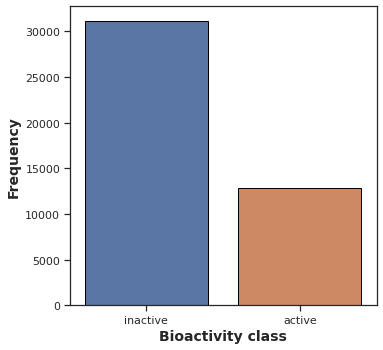

In [29]:
# Frequency plot of the 2 bioactivity classes

plt.figure(figsize=(5.5, 5.5))

sns.countplot(x='class', data=df_2class, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')

plt.savefig('plot_bioactivity_class.pdf')

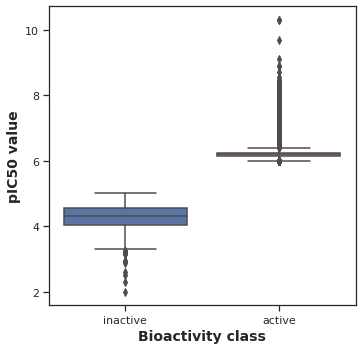

In [30]:
#pIC50 value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'pIC50', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('pIC50 value', fontsize=14, fontweight='bold')

plt.savefig('plot_ic50.pdf')

In [31]:
# Statistical analysis | Mann-Whitney U Test

def mannwhitney(descriptor, verbose=False):
  # https://machinelearningmastery.com/nonparametric-statistical-significance-tests-in-python/
  from numpy.random import seed
  from numpy.random import randn
  from scipy.stats import mannwhitneyu

# seed the random number generator
  seed(1)

# actives and inactives
  selection = [descriptor, 'class']
  df = df_2class[selection]
  active = df[df['class'] == 'active']
  active = active[descriptor]

  selection = [descriptor, 'class']
  df = df_2class[selection]
  inactive = df[df['class'] == 'inactive']
  inactive = inactive[descriptor]

# compare samples
  stat, p = mannwhitneyu(active, inactive)
  #print('Statistics=%.3f, p=%.3f' % (stat, p))

# interpret
  alpha = 0.05
  if p > alpha:
    interpretation = 'Same distribution (fail to reject H0)'
  else:
    interpretation = 'Different distribution (reject H0)'
  
  results = pd.DataFrame({'Descriptor':descriptor,
                          'Statistics':stat,
                          'p':p,
                          'alpha':alpha,
                          'Interpretation':interpretation}, index=[0])
  filename = 'mannwhitneyu_' + descriptor + '.csv'
  results.to_csv(filename)

  return results


In [32]:
# Statistical analysis | Mann-Whitney U Test
mannwhitney('pIC50')

,Descriptor,Statistics,p,alpha,Interpretation
0,pIC50,400228290.0,0.0,0.05,Different distribution (reject H0)


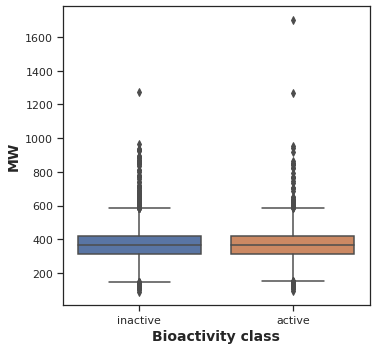

In [33]:
# plot molecular weight (MW)

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'MW', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('MW', fontsize=14, fontweight='bold')

plt.savefig('plot_MW.pdf')

In [34]:
#Statistical analysis | Mann-Whitney U Test
mannwhitney('MW')

,Descriptor,Statistics,p,alpha,Interpretation
0,MW,202520307.0,0.047055,0.05,Different distribution (reject H0)


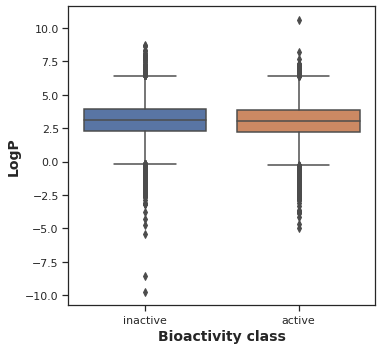

In [35]:
# LogP value

plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'LogP', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('LogP', fontsize=14, fontweight='bold')

plt.savefig('plot_LogP.pdf')

In [36]:
#Statistical analysis | Mann-Whitney U Test
mannwhitney('LogP')

,Descriptor,Statistics,p,alpha,Interpretation
0,LogP,192603750.0,5.706660e-10,0.05,Different distribution (reject H0)


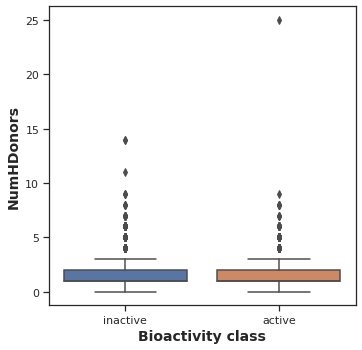

In [37]:
# NumHDonors
plt.figure(figsize=(5.5, 5.5))

sns.boxplot(x = 'class', y = 'NumHDonors', data = df_2class)

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('NumHDonors', fontsize=14, fontweight='bold')

plt.savefig('plot_NumHDonors.pdf')


In [38]:
# Statistical analysis | Mann-Whitney U Test
mannwhitney('NumHDonors')

,Descriptor,Statistics,p,alpha,Interpretation
0,NumHDonors,203536305.0,0.002287,0.05,Different distribution (reject H0)
